In [18]:
import tensorflow as tf
import os
import random
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense,MaxPooling2D,Activation,Flatten

In [19]:
os.chdir(r'C:\Users\Dell\Downloads\archive (3)\yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(64,64))
      X.append(img)
      y.append(1)
os.chdir(r'C:\Users\Dell\Downloads\archive (3)\no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(64,64))
      X.append(img)
      y.append(0)

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

In [20]:
combined = list(zip(X,y))

In [21]:
random.shuffle(combined)

In [22]:
X,y = zip(*combined)
X=np.array(X)
y=np.array(y)
print(y)

[1 0 0 ... 0 1 0]


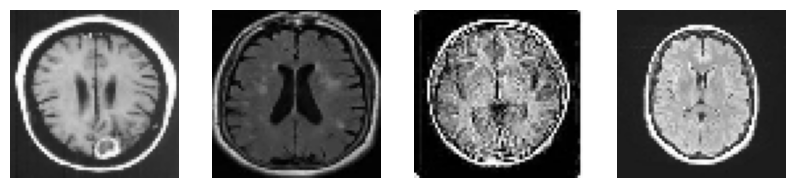

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (64, 64, 3)
Shape of an image in X_test:  (64, 64, 3)


In [25]:
from keras.utils import normalize
X_train = normalize(X_train,axis=1)
X_test = normalize(X_test,axis=1)

In [26]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=2)
y_test = to_categorical(y_test,num_classes=2)

In [27]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (2400, 64, 64, 3)
X_test Shape:  (600, 64, 64, 3)
y_train Shape:  (2400, 2)
y_test Shape:  (600, 2)


In [28]:
INPUT_SIZE = 64

In [29]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [30]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [31]:
history = model.fit(X_train,y_train,
                    epochs=10,
                    batch_size = 16,
                    validation_data=(X_test,y_test))

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6509 - loss: 0.6171 - val_accuracy: 0.7667 - val_loss: 0.4996
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7988 - loss: 0.4601 - val_accuracy: 0.8400 - val_loss: 0.4056
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8401 - loss: 0.3732 - val_accuracy: 0.9050 - val_loss: 0.2888
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8899 - loss: 0.2650 - val_accuracy: 0.9300 - val_loss: 0.2329
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9353 - loss: 0.1791 - val_accuracy: 0.9133 - val_loss: 0.2351
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9450 - loss: 0.1586 - val_accuracy: 0.9483 - val_loss: 0.1495
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9744 - loss: 0.0899 - val_accuracy: 0.9650 - val_loss: 0.1322
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9794 - loss: 0.0613 - val_accu

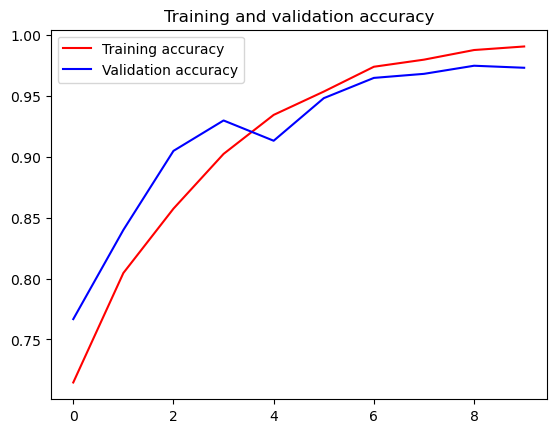

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [33]:
model.save(r'C:\Users\Dell\CNN\t_dataset\brain_tumour.keras')